<a href="https://colab.research.google.com/github/Seong-jieun/Personal_Project/blob/main/Customer_Personality_Segment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

- 브라질의 음식 배달 앱 회사인 iFood에서 데이터 분석가 채용을 위해 제공한 데이터 세트이며 iFood 회사의 실제 데이터인지는 확인하지 못하였다. [출처-Github](https://github.com/nailson/ifood-data-business-analyst-test/tree/master)
- 고객의 연령, 교육 수준, 연간 수입, 물품 구매 금액 등이 포함된 데이터 세트이다.  [출처-Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
- 분석 목표
    - 고객 세분화 분석을 통한 고객 그룹을 세분화하고 그룹별 비즈니스 전략을 제안한다.
- 분석 내용
    - 고객 세분화 분석
        - Recency: 고객의 최근 방문
        - Monetary: 총 구매 금액
        - Engagement: 고객 참여도(고객이 구매에 참여한 총 횟수)
- 분석 시 설정
    - 브라질 회사에서 제공한 데이터이므로 브라질 화폐단위인 헤알을 사용하였다.
    - 멤버십과 포인트 제도를 운영하는 서비스라고 가정한다.

    

# 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
df = pd.read_csv('/content/drive/MyDrive/personal_da_project/marketing_campaign.csv', sep="\t")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 데이터 전처리

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**< 컬럼 정보 >**

[**사람(고객)** 관련 컬럼]

- ID: 고객의 고유 식별 ID
- Year_Birth: 고객의 출생 연도
- Education: 고객의 학력
- Marital_Status: 고객의 결혼 상태
- Income: 고객의 연간 가구 소득
- Kidhome: 고객 가정의 어린 자녀 수
- Teenhome: 고객 가정의 청소년 수
- Dt_Customer: 고객이 회원 가입한 날짜
- Recency: 고객의 마지막 구매 이후 경과된 일 수
- Complain: 지난 2년동안 고객이 불만을 제기한 경우 1, 그렇지 않은 경우 0

---

[**제품** 관련 컬럼]

- MntWines: 지난 2년간 와인에 쓴 금액
- MntFruits: 지난 2년간 과일에 쓴 금액
- MntMeatProducts: 지난 2년간 육류에 쓴 금액
- MntFishProducts: 지난 2년간 생선에 쓴 금액
- MntSweetProducts: 지난 2년간 과자에 쓴 금액
    - 위의 다섯가지 제품들은 *Gold*와 *Regular* 제품으로 분류된다.
- Mnt*Gold*Prods: 지난 2년간 *Gold* 제품에 쓴 금액


---

[**홍보** 관련 컬럼]

- NumDealsPurchases: 할인된 구매 횟수
- AcceptedCmp1: 고객이 첫 번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp2: 고객이 2번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp3: 고객이 3번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp4: 고객이 4번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- AcceptedCmp5: 고객이 5번째 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0
- Response: 고객이 마지막 캠페인에서 제안을 수락한 경우 1, 그렇지 않은 경우 0

---

[**구매 채널** 관련 컬럼]

- NumWebPurchases: 웹사이트를 통해 구매한 횟수
- NumCatalogPurchases: 카탈로그를 사용하여 구매한 횟수
- NumStorePurchases: 매장에서 직접 구매한 횟수
- NumWebVisitsMonth: 지난 달에 웹사이트를 방문한 횟수

In [6]:
# 결측값 개수 확인
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
# 'Income'컬럼의 결측값을 평균값으로 대체
df['Income'] = df['Income'].fillna(df['Income'].mean())

# 'Dt_Customer'컬럼 타입 변경 (object -> datetime)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [8]:
# 'Marital_Status' 컬럼 고유값 확인
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
# 'Education' 컬럼 고유값 확인
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [10]:
# 컬럼 내 항목 재분류
df['Marital_Status'] = df['Marital_Status'].replace({'Single':'Single', 'Together':'Couple', 'Married':'Couple', 'Divorced':'Single',
                                                     'Widow':'Single', 'Alone':'Single', 'Absurd':'Single', 'YOLO':'Single'})
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Postgraduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

# 컬럼명 변경
df.rename(columns={'MntWines':'Wine', 'MntFruits':'Fruits', 'MntMeatProducts':'Meat', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Premium'}, inplace=True)
df.rename(columns={'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

In [11]:
# 컬럼의 고유값 수 확인
df.nunique()

# Z_CostContact, Z_Revenue 컬럼은 고유값이 각 한 개씩이므로 분석에 큰 영향이 없을 것으로 보인다

,0
ID,2240
Year_Birth,59
Education,2
Marital_Status,2
Income,1975
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
Wine,776


## 파생 변수 생성

[참고 사항]
- 기준연도: 2025년
    - 데이터에 기간을 알 수 있는 정보가 없으므로 현재 연도인 2025년을 기준연도로 한다
- 총 구매 금액 (Monetary)
    - Premium(Gold)제품을 제외한 다섯가지 제품의 총합을 총 구매 금액으로 계산한다
- 고객 참여도 (Engagement)
    - 고객 참여도를 고객이 각 채널을 이용한 횟수를 합산한 값으로 정의한다

In [12]:
# 고객의 나이
df['Age'] = 2025 - df['Year_Birth']

# 고객이 회원 가입한 년도
df['Year'] = df['Dt_Customer'].dt.year

# 회원가입 유지기간
df['Membership_period'] = 2025 - df['Year']

# 자녀 수
df['Children'] = df['Kidhome'] + df['Teenhome']

# 자녀 유무
df['Has_child'] = np.where(df['Children'] > 0, 'Y', 'N')

# 총 구매 금액
df['Monetary'] = df['Wine'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets']

# 고객 참여도
df['Engagement'] = df['Web'] + df['Catalog'] + df['Store']

## 범주형 컬럼 -> 숫자형으로 변경

- 범주형 변수들 중 'Education', 'Marital_Status', 'Has_child' 컬럼을 숫자형으로 변경한다 (0 과 1)
- get_dummies()나 One-Hot Encoding을 사용하지 않은 이유
    - 세 컬럼은 고유값이 두 개씩이므로 replace()를 이용하기에 번거롭지 않았다
    - 고객 세분화 과정에 머신러닝을 사용하지 않을 예정이고, 세 컬럼 또한 세분화 기준에 포함되지 않는다
    - 다른 컬럼들과 상관 관계 확인을 위해 진행하는 작업이기 때문에 사용하지 않는다

In [13]:
# 범주형 변수들 값 대체
df['Education'] = df['Education'].replace({'Undergraduate':0, 'Postgraduate':1})
df['Marital_Status'] = df['Marital_Status'].replace({'Single':0, 'Couple':1})
df['Has_child'] = df['Has_child'].replace({'N':0, 'Y':1})

- 데이터프레임 생성

In [14]:
# 필요한 컬럼만 데이터프레임 생성
data = df[['ID', 'Age', 'Education', 'Income', 'Membership_period', 'Marital_Status', 'Children', 'Has_child', 'Recency'
            , 'Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Premium', 'Monetary', 'Web', 'Catalog', 'Store', 'Engagement']]

In [15]:
data.head()

,ID,Age,Education,Income,Membership_period,Marital_Status,Children,Has_child,Recency,Wine,Fruits,Meat,Fish,Sweets,Premium,Monetary,Web,Catalog,Store,Engagement
0,5524,68,1,58138.0,13,0,0,0,58,635,88,546,172,88,88,1529,8,10,4,22
1,2174,71,1,46344.0,11,0,2,1,38,11,1,6,2,1,6,21,1,1,2,4
2,4141,60,1,71613.0,12,1,0,0,26,426,49,127,111,21,42,734,8,2,10,20
3,6182,41,1,26646.0,11,1,1,1,26,11,4,20,10,3,5,48,2,0,4,6
4,5324,44,1,58293.0,11,1,1,1,94,173,43,118,46,27,15,407,5,3,6,14


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Age                2240 non-null   int64  
 2   Education          2240 non-null   int64  
 3   Income             2240 non-null   float64
 4   Membership_period  2240 non-null   int32  
 5   Marital_Status     2240 non-null   int64  
 6   Children           2240 non-null   int64  
 7   Has_child          2240 non-null   int64  
 8   Recency            2240 non-null   int64  
 9   Wine               2240 non-null   int64  
 10  Fruits             2240 non-null   int64  
 11  Meat               2240 non-null   int64  
 12  Fish               2240 non-null   int64  
 13  Sweets             2240 non-null   int64  
 14  Premium            2240 non-null   int64  
 15  Monetary           2240 non-null   int64  
 16  Web                2240 

**< 최종 컬럼 정보 >**

[**고객** 관련 컬럼]
- ID: 고객의 고유 식별 ID
- Age: 고객의 나이
- Education: 고객의 학력 (0: Undergraduate, 1: Postgraduate)
- Income: 고객의 연간 가구 소득
- Membership_period: 회원가입 유지 기간
- Marital_Status: 고객의 결혼 상태 (0: Single, 1: Couple)
- Children: 고객의 자녀 수
- Has_child: 고객의 자녀 유무 (0: N, 1: Y)

[**제품** 관련 컬럼]
- Wine: 지난 2년간 와인에 쓴 금액
- Fruits: 지난 2년간 과일에 쓴 금액
- Meat: 지난 2년간 육류에 쓴 금액
- Fish: 지난 2년간 생선에 쓴 금액
- Sweets: 지난 2년간 과자에 쓴 금액
- Premium: 지난 2년간 프리미엄 제품에 쓴 금액

[**구매 채널** 관련 컬럼]
- Web: 웹사이트를 통해 구매한 횟수
- Catalog: 카탈로그를 사용하여 구매한 횟수
- Store: 매장에서 직접 구매한 횟수

[**고객 세분화** 관련 컬럼]
- Recency: 고객의 마지막 구매 이후 경과된 일 수 (값이 작을수록 최근에 구매한 것)
- Monetary: 고객의 총 구매 금액
- Engagement: 고객이 구매 채널을 통해 구매에 참여한 총 횟수, 고객 참여도

# EDA


- 범주형 컬럼
    - cat_cols: 'Education', 'Membership_period', 'Marital_Status', 'Has_child', 'Children'
- 연속형 컬럼
    - 고객 관련 컬럼
        - customer_cols: 'Age', 'Income'
    - 물품 관련 컬럼
        - product_cols: 'Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Premium'
    - 채널 관련 컬럼
        - channel_cols: 'Web', 'Catalog', 'Store'
    - 고객 세분화 관련 컬럼
        - segment_cols: 'Recency', 'Monetary', 'Engagement'


## 범주형 컬럼

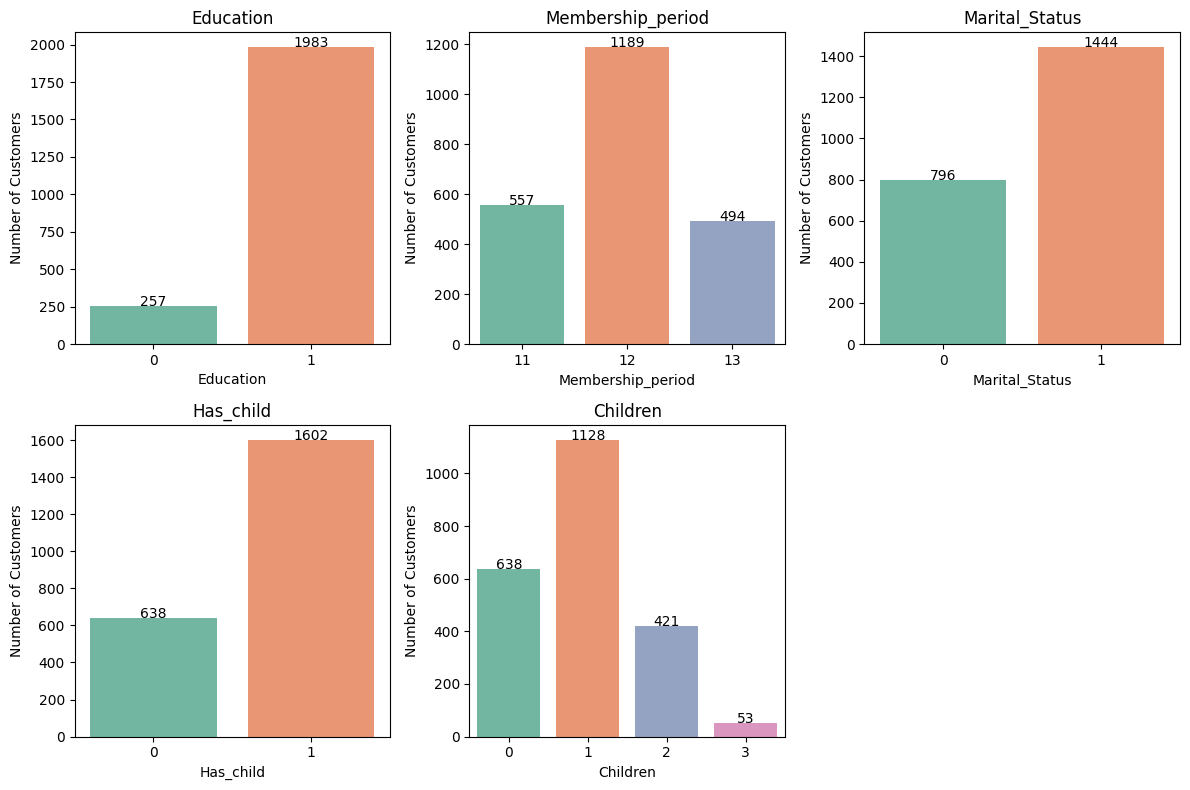

In [17]:
# 범주형 컬럼
cat_cols = ['Education', 'Membership_period', 'Marital_Status', 'Has_child', 'Children']

# 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()

# 그래프 그리기
for ax, col in zip(axes, cat_cols):
    sns.countplot(data=data, x=col, palette='Set2', ax=ax)
    # 값 표시
    for p in ax.patches:
        ax.text(p.get_x() + (p.get_width() / 2), p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha='center')
    # 제목, 축 설정
    ax.set_title(col)
    ax.set_ylabel('Number of Customers')

# 그래프 없는 공간 삭제
if len(cat_cols) < len(axes):
    for i in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[i])

# 그래프 출력
plt.tight_layout()
plt.show()

- 대학을 졸업한 고객(1983명)이 대학을 졸업하지 않은 고객(257명)보다 많다
- 커플인 고객(1444명)이 싱글인 고객(796명)보다 많다
- 회원 유지 기간은 11년~13년이며 12년동안 회원을 유지한 고객이 1189명으로 제일 많다
- 자녀가 있는 고객(1602명)이 자녀가 없는 고객(638명)보다 많다
- 자녀가 있는 고객 중 자녀가 1명인 경우(1128명)가 제일 많고 2명인 경우(421명), 3명인 경우(53명) 순서이다

## 연속형 컬럼

### 고객 관련 컬럼

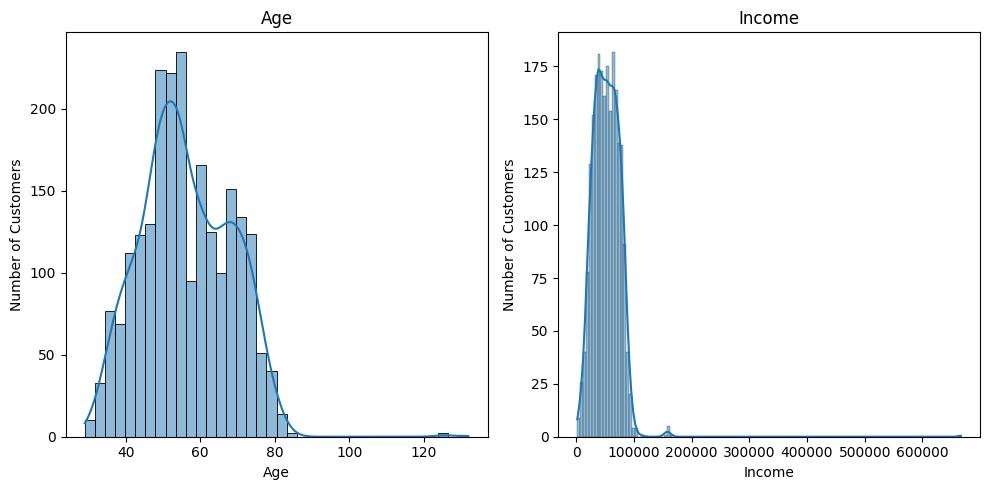

In [18]:
# 고객 관련 컬럼
customer_cols = ['Age', 'Income']

fig, axes = plt.subplots(nrows=1, ncols=len(customer_cols), figsize=(10, 5))
axes = axes.flatten()

for ax, col in zip(axes.flatten(), customer_cols):
    sns.histplot(data=data, x=col, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

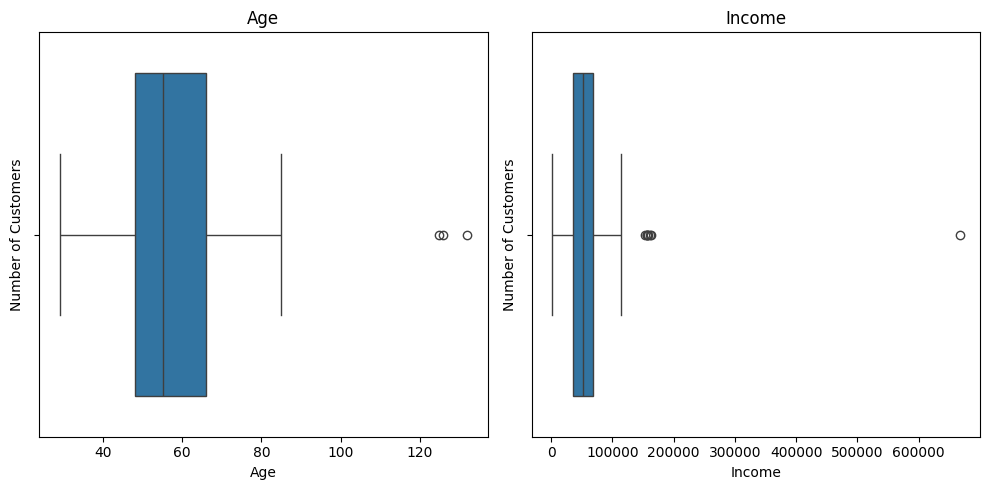

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=len(customer_cols), figsize=(10, 5))
axes = axes.flatten()

for ax, col in zip(axes.flatten(), customer_cols):
    sns.boxplot(data=data, x=col, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

- Age
    - 40대 후반 ~ 60대 후반에 많이 분포한다
    - 100세가 넘는 사람도 있음을 알 수 있는데, 기준 연도를 알 수 없어서 현재 연도인 2025년을 기준으로 한 영향으로 보인다
- Income
    - 100,000 헤알 미만

### 물품 관련 컬럼

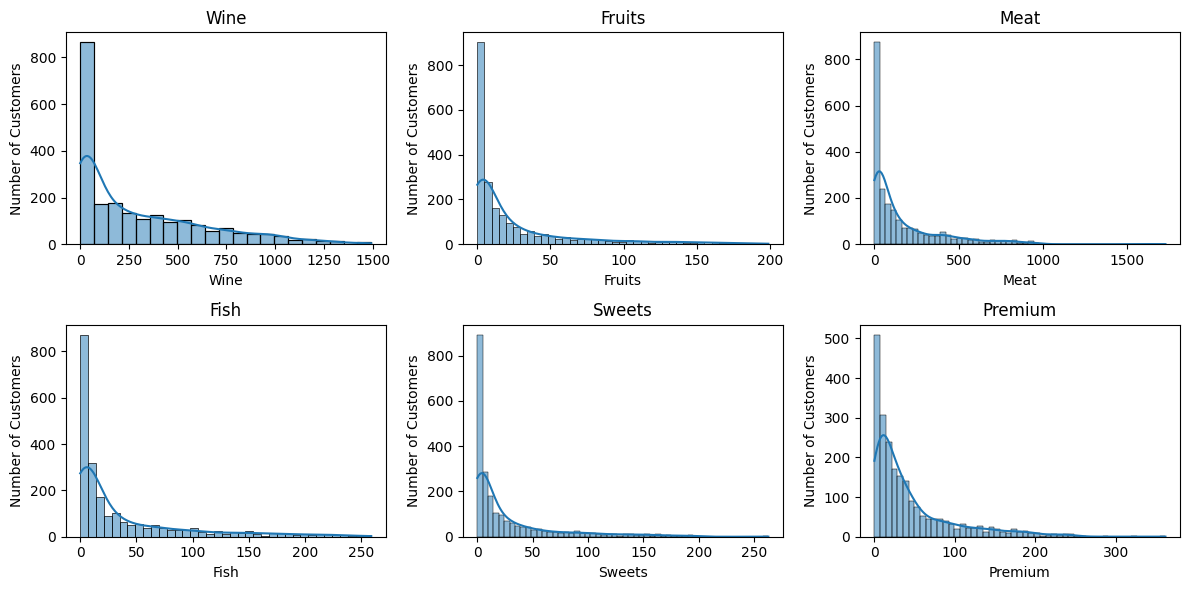

In [20]:
# 물품 관련 컬럼
product_cols = ['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Premium']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

for ax, col in zip(axes.flatten(), product_cols):
    sns.histplot(data=data, x=col, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

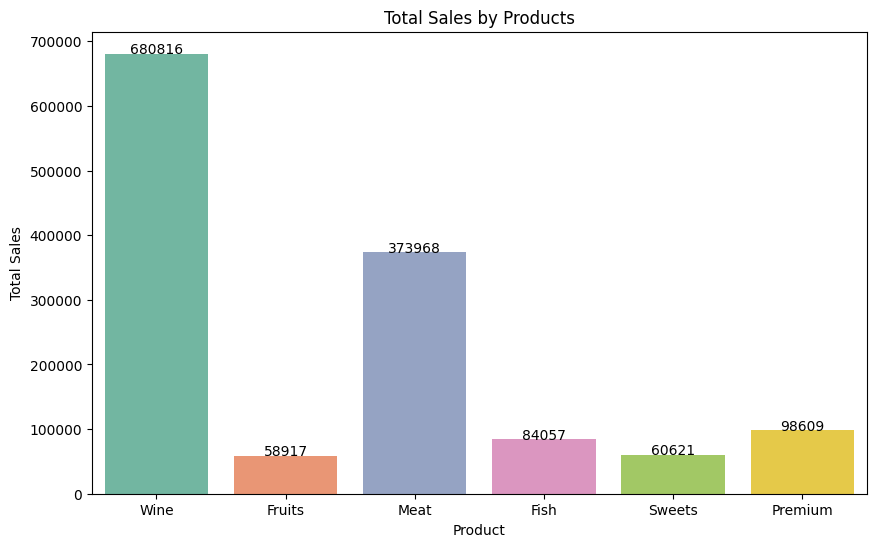

In [21]:
# 물품별 총 매출액 계산
product = data[['Wine', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Premium']]
product_sum = product.sum()

# 물품별 총 매출액 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sum.index, y=product_sum.values, palette='Set2')

for p in plt.gca().patches:
    plt.text(p.get_x() + (p.get_width() / 2), p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha='center')

plt.title('Total Sales by Products')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()

### 채널 관련 컬럼

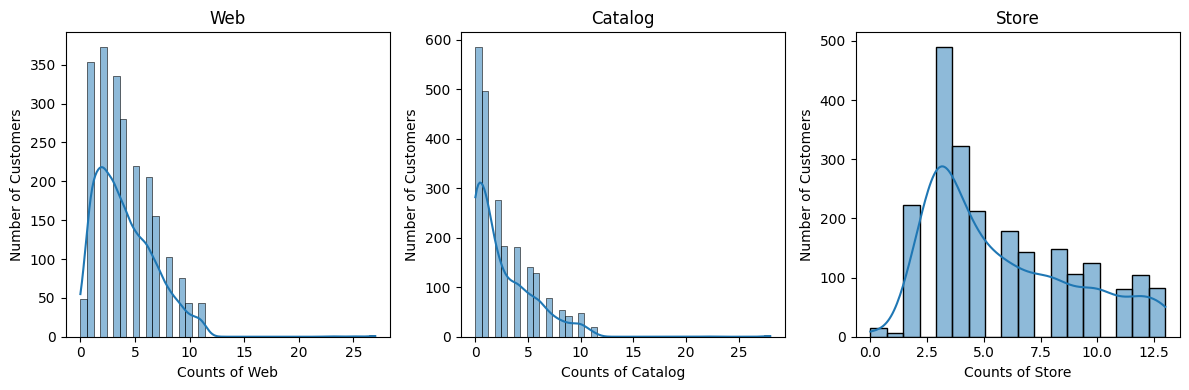

In [22]:
# 채널 관련 컬럼
channel_cols = ['Web', 'Catalog', 'Store']

fig, axes = plt.subplots(nrows=1, ncols=len(channel_cols), figsize=(12, 4))
axes = axes.flatten()

for ax, col in zip(axes.flatten(), channel_cols):
    sns.histplot(data=data, x=col, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel(f'Counts of {col}')
    ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

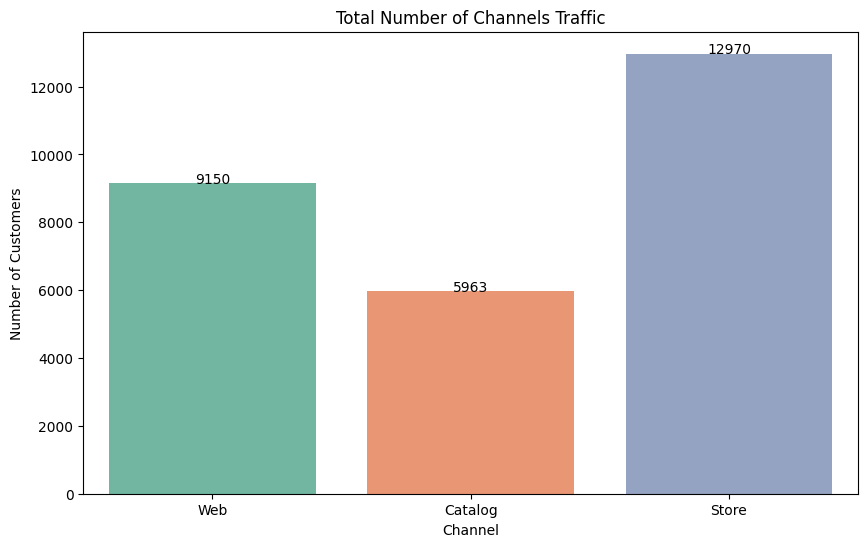

In [23]:
# 채널별 총 유입수 계산
channel = data[['Web', 'Catalog', 'Store']]
channel_sum = channel.sum()

# 채널별 총 유입수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_sum.index, y=channel_sum.values, palette='Set2')

for p in plt.gca().patches:
    plt.text(p.get_x() + (p.get_width() / 2), p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha='center')

plt.title('Total Number of Channels Traffic')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.show()

### 고객 세분화 관련 컬럼

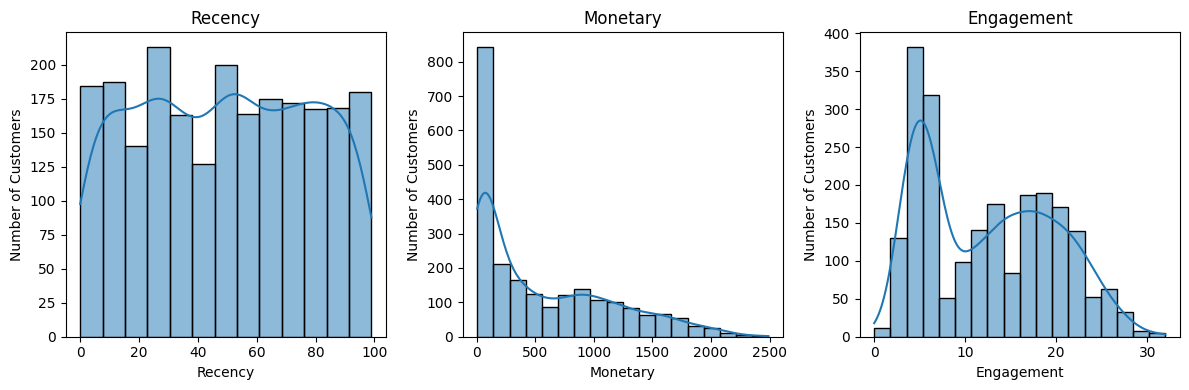

In [24]:
# 고객 세분화 관련 컬럼
segment_cols = ['Recency', 'Monetary', 'Engagement']

fig, axes = plt.subplots(nrows=1, ncols=len(segment_cols), figsize=(12, 4))
axes = axes.flatten()

for ax, col in zip(axes.flatten(), segment_cols):
    sns.histplot(data=data, x=col, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

## 상관 관계 확인

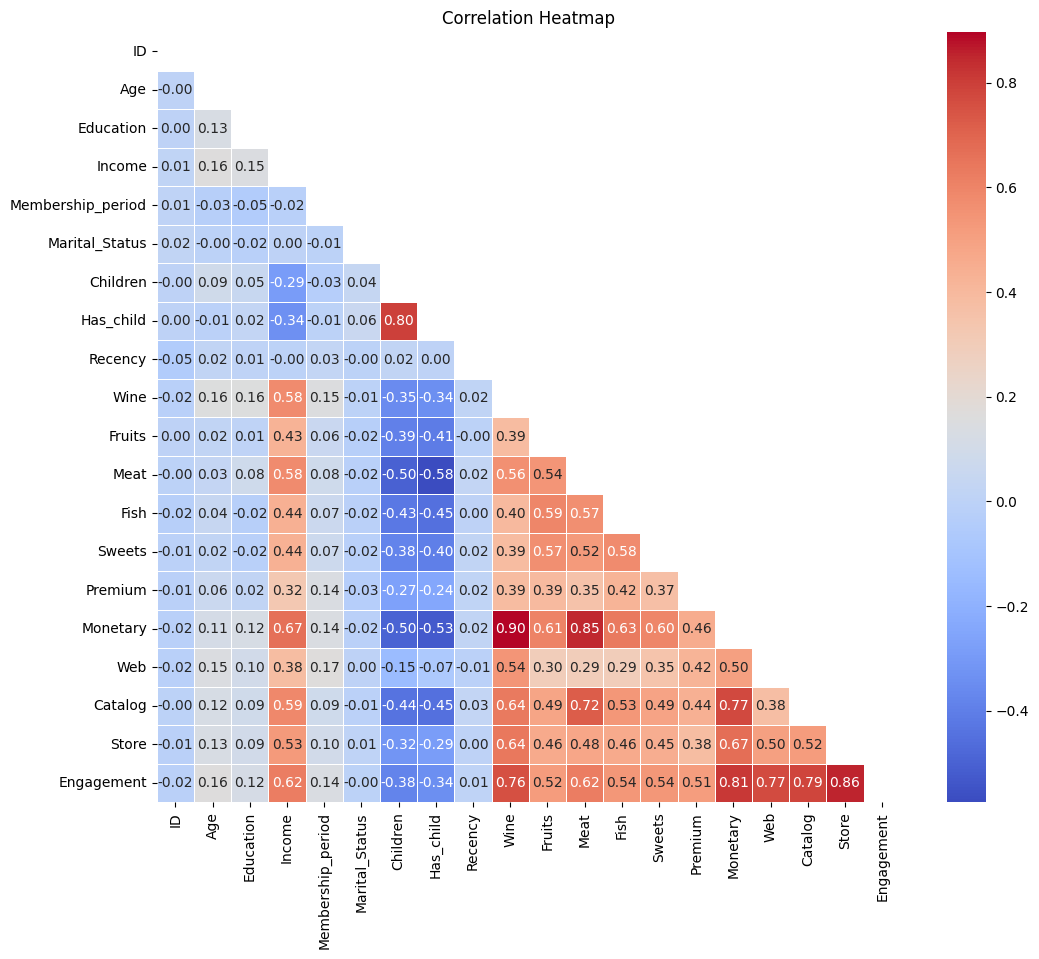

In [25]:
# 상관 행렬 계산
corr = data.corr()

# 마스크 생성 (위쪽 삼각형 숨기기)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- Recency
    - 다른 컬럼과 상관관계가 거의 없다
- Monetary
    - 제품 중 와인, 육류와 매우 강한 양의 상관관계를 가진다
    - 구매 채널 중 카탈로그, 매장과 강한 양의 상관관계를 가진다
    - Engagement와 강한 양의 상관관계를 가진다
- Engagement
    - 제품 중 와인, 육류와 강한 양의 상관관계를 가진다
    - 구매 채널 중 매장과 매우 강한 양의 상관관계를 가지며 다른 채널도 양의 상관관계를 보인다
    - Monetary와 강한 양의 상관관계를 가지며, 고객이 구매에 참여하는 횟수가 증가할수록 구매 금액도 증가함을 의미한다
- Income
    - 고객 관련 컬럼 중 다른 컬럼에 비해 유의미한 상관관계를 보인다
    - 제품 중에서는 와인, 육류, 구매 채널 중에서는 카탈로그와 매장과 높은 양의 상관관계를 가진다
    - Monetary, Engagement와도 양의 상관관계를 가지며 연소득이 높을수록 지출을 많이 하는 것으로 보인다
- 나이, 교육수준, 멤버십 유지기간, 결혼 상태, 자녀 수, 자녀 유무는 다른 컬럼과 큰 상관관계가 없다(음의 상관관계)


# 고객 세분화

## 세분화 기준 정하기

**Recency**
- 값이 낮을수록 최근에 방문한 것이다
- 최소 0일 부터 최대 99일(약 3개월)이며 전체 분포가 고른 편이다
- 0 ~ 30: recent 3 / 31 ~ 60: middle 2 / 61 ~ 99: past 1

**Monetary**
- 단위: 헤알(브라질 화폐)
- 4 ~ 198: low 1, 199 ~ 963: middle 2, 964 ~ 2491: high 3

**Engagement**
- 값이 클수록 참여도가 높다
- 0 ~ 10: low 1, 11 ~ 20: middle 2, 21 ~ 32: high 3


*✔ score_table과 segment_table은 스프레드시트로 작업함*

- 고객 세분화 기준표

In [26]:
score_table = pd.read_csv('/content/drive/MyDrive/personal_da_project/score_table.csv')
score_table

,score,Recency_scale,Monetary_scale,Engagement_scale
0,1,61~99,4~198,0~10
1,2,31~60,199~963,11~20
2,3,0~30,964~2491,21~32


- 고객 세분화 기준에 따른 고객 세분화 점수와 고객 그룹 분류

In [27]:
segment_table = pd.read_csv('/content/drive/MyDrive/personal_da_project/segment_table.csv')
segment_table

# score 조합은 27가지이며, 조합에 따라 슈퍼 고객, 충성 고객, 잠재 충성 고객, 관심 필요 고객, 이탈 고객 다섯개 그룹으로 나뉜다

,Recency_score,Monetary_score,Engagement_score,Segment
0,3,3,3,슈퍼 고객
1,3,3,2,슈퍼 고객
2,3,3,1,잠재 충성 고객
3,3,2,3,충성 고객
4,3,2,2,충성 고객
5,3,2,1,잠재 충성 고객
6,3,1,3,잠재 충성 고객
7,3,1,2,관심 필요 고객
8,3,1,1,관심 필요 고객
9,2,3,3,충성 고객


## 고객 세분화 점수, Segment 부여하기



- 고객 세분화 점수 부여

In [28]:
# Recency 점수 부여
data['Recency_Score'] = pd.cut(data['Recency'], bins=[0, 30, 60, 99], labels=[3, 2, 1], right=True)

# Monetary 점수 부여
data['Monetary_Score'] = pd.cut(data['Monetary'], bins=[4, 198, 963, 2491], labels=[1, 2, 3], right=True)

# Engagement 점수 부여
data['Engagement_Score'] = pd.cut(data['Engagement'], bins=[0, 10, 20, 32], labels=[1, 2, 3], right=True)

- Segment 부여
    - 슈퍼 고객 -> super
    - 충성 고객 -> loyal
    - 잠재 충성 고객 -> poten_loyal
    - 관심 필요 고객 -> attention
    - 이탈 고객 -> churn

In [29]:
def segment_by_combination(row):
    super = {(3, 3, 3), (3, 3, 2)}
    loyal = {(3, 2, 3), (3, 2, 2), (2, 3, 3)}
    poten_loyal = {(3, 3, 1), (3, 2, 1), (3, 1, 3), (2, 3, 2), (2, 3, 1), (2, 2, 3), (2, 2, 2)}
    attention = {(3, 1, 2), (3, 1, 1), (2, 2, 1), (2, 1, 3), (1, 3, 3), (1, 3, 2), (1, 3, 1)}

    scores = (row['Recency_Score'], row['Monetary_Score'], row['Engagement_Score'])

    if scores in super:
        return 'super'
    elif scores in loyal:
        return 'loyal'
    elif scores in poten_loyal:
        return 'poten_loyal'
    elif scores in attention:
        return 'attention'
    else:
        return 'churn'

In [31]:
data['Segment'] = data.apply(segment_by_combination, axis=1)

In [32]:
data.head()

,ID,Age,Education,Income,Membership_period,Marital_Status,Children,Has_child,Recency,Wine,...,Premium,Monetary,Web,Catalog,Store,Engagement,Recency_Score,Monetary_Score,Engagement_Score,Segment
0,5524,68,1,58138.0,13,0,0,0,58,635,...,88,1529,8,10,4,22,2,3,3,loyal
1,2174,71,1,46344.0,11,0,2,1,38,11,...,6,21,1,1,2,4,2,1,1,churn
2,4141,60,1,71613.0,12,1,0,0,26,426,...,42,734,8,2,10,20,3,2,2,loyal
3,6182,41,1,26646.0,11,1,1,1,26,11,...,5,48,2,0,4,6,3,1,1,attention
4,5324,44,1,58293.0,11,1,1,1,94,173,...,15,407,5,3,6,14,1,2,2,churn


## 고객 그룹별 EDA

### 그룹별 분포 분석

- 그룹별 고객 수

In [33]:
# 그룹별 고객 수
seg_counts = data['Segment'].value_counts(ascending=True)
print(seg_counts)

# super 에서 churn 그룹으로 갈수록 그룹별 고객 수가 많아지고, loyal과 poten_loyal 그룹은 수가 크게 차이나지 않는다

Segment
super          173
loyal          287
poten_loyal    312
attention      517
churn          951
Name: count, dtype: int64


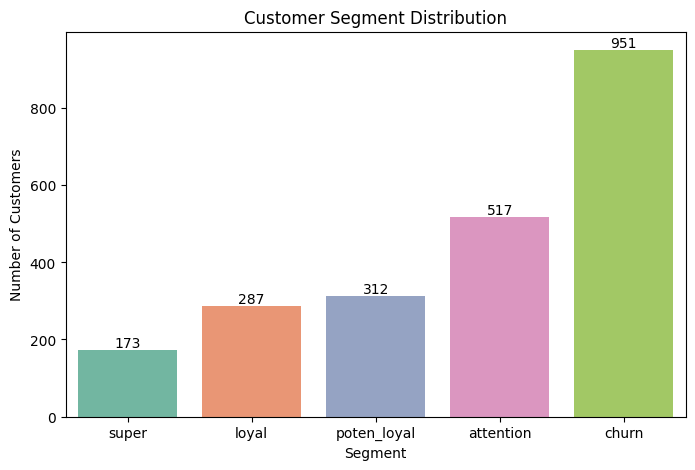

In [34]:
# 그룹별 고객 수 시각화

plt.figure(figsize=(8, 5))
sns.barplot(x=seg_counts.index, y=seg_counts.values, palette='Set2')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segment Distribution')
plt.show()

- 그룹별 Recency, Monetary, Engagement 분포 확인하기

In [35]:
# Segment별 Recency 분포 확인
data.groupby('Segment')[['Recency']].describe()

# super 그룹은 최근 30일 이내에 방문했다
# loyal 그룹은 10일 이내 부터, poten_loyal 그룹은 37일 이내부터 60일 이내에 방문했다
# attention 그룹은 최근 14일 이내에 방문한 고객도 있지만 절반 이상이 최근 방문한 지 한 달 이상이다
# churn 그룹은 최근 방문한 지 52~99일 경과한 그룹이다

Recency                                                   
              count       mean        std  min   25%   50%   75%   max
Segment                                                               
attention     517.0  43.653772  32.934955  1.0  14.0  28.0  76.0  99.0
churn         951.0  67.425868  22.154161  0.0  52.0  71.0  85.0  99.0
loyal         287.0  23.606272  15.969432  1.0  10.0  21.0  30.5  60.0
poten_loyal   312.0  44.487179  11.215508  2.0  37.0  46.0  54.0  60.0
super         173.0  15.369942   9.456855  1.0   6.0  15.0  25.0  30.0

In [36]:
# Segment별 Monetary 분포 확인
data.groupby('Segment')[['Monetary']].describe()

# super 그룹은 총 구매 금액의 최소값은 964로 다른 그룹보다 눈에 띄게 높다
# loyal, poten_loyal 그룹은 평균 등 분포가 크게 차이가 나지 않으며, loyal 그룹이 조금 더 많은 금액을 지불했다
# attention 그룹은 값의 분포가 제일 넓다
# churn 그룹은 모든 값이 가장 낮다

Monetary                                                          \
               count         mean         std    min     25%     50%     75%   
Segment                                                                        
attention      517.0   650.696325  710.640967    8.0    42.0   123.0  1294.0   
churn          951.0   219.945321  275.555911    4.0    37.0    70.0   305.0   
loyal          287.0   793.616725  466.444923  252.0   396.0   702.0   966.5   
poten_loyal    312.0   774.846154  445.050323  216.0   392.0   716.5  1077.0   
super          173.0  1406.248555  338.531939  964.0  1118.0  1352.0  1654.0   

                     
                max  
Segment              
attention    2491.0  
churn        1182.0  
loyal        2304.0  
poten_loyal  2188.0  
super        2429.0

In [37]:
# Segment별 Engagement 분포 확인
data.groupby('Segment')[['Engagement']].describe()

# super, loyal 그룹은 최소 11회 이상 서비스를 이용했다
# poten_loyal, attention, churn 그룹은 고객 참여도 분포가 넓은 편이다

Engagement                                                   
                 count       mean       std   min   25%   50%   75%   max
Segment                                                                  
attention        517.0  11.655706  7.866216   1.0   5.0   7.0  19.0  32.0
churn            951.0   8.633018  5.647442   0.0   4.0   6.0  12.0  27.0
loyal            287.0  18.693380  4.956107  11.0  14.0  19.0  23.0  30.0
poten_loyal      312.0  16.230769  3.941446   1.0  13.0  16.0  19.0  28.0
super            173.0  19.757225  4.260284  11.0  16.0  19.0  23.0  32.0

- 그룹별 연간소득 비교

In [38]:
# Segment별 Income 분포 확인
data.groupby('Segment')[['Income']].describe()

# super 그룹으로 갈수록 평균 연간소득이 높다
# Monetary 분포에서 확인한 것과 마찬가지로 super 그룹은 다섯 그룹 중 지불 능력이 제일 좋은 그룹이라고 할 수 있다
# attention 그룹의 연간소득 분포가 제일 넓다

Income                                                     \
             count          mean           std      min           25%   
Segment                                                                 
attention    517.0  52649.134931  35848.350947   5305.0  31859.000000   
churn        951.0  41314.498175  18140.134375   1730.0  28433.500000   
loyal        287.0  62840.096704  15225.838448   2447.0  52546.125677   
poten_loyal  312.0  61936.508827  13555.080624  28973.0  52247.251354   
super        173.0  76097.421965  13378.347776  51537.0  69109.000000   

                                              
                 50%           75%       max  
Segment                                       
attention    46463.0  72679.000000  666666.0  
churn        38998.0  52247.251354  162397.0  
loyal        63120.0  71734.000000  113734.0  
poten_loyal  62187.0  72515.500000   91700.0  
super        75437.0  82170.000000  160803.0

- 그룹별 구매 채널별 비교

In [39]:
# 그룹별 Web 채널 비교
data.groupby('Segment')[['Web']].describe()

# Web은 loyal 그룹이 가장 많이 이용하며 그 다음으로는 super, poten_loyal 그룹이 많이 이용한다

Web                                              
             count      mean       std  min  25%  50%  75%   max
Segment                                                         
attention    517.0  3.411992  2.512467  0.0  2.0  3.0  5.0  11.0
churn        951.0  3.079916  2.482767  0.0  1.0  2.0  4.0  25.0
loyal        287.0  6.181185  2.783931  0.0  4.5  6.0  7.0  27.0
poten_loyal  312.0  5.458333  2.119772  0.0  4.0  5.0  7.0  11.0
super        173.0  5.664740  2.511086  0.0  4.0  5.0  7.0  11.0

In [40]:
# 그룹별 Catalog 채널 비교
data.groupby('Segment')[['Catalog']].describe()

# Catalog는 super 그룹이 평균적으로 제일 많이 이용했다
# 다른 채널에 비해 평균 이용 횟수가 적은 것으로 보아 고객들이 주로 이용하는 채널은 아니다

Catalog                                              
              count      mean       std  min  25%  50%  75%   max
Segment                                                          
attention     517.0  2.820116  3.235663  0.0  0.0  1.0  5.0  22.0
churn         951.0  1.264984  1.805029  0.0  0.0  1.0  2.0  11.0
loyal         287.0  4.059233  3.057716  0.0  2.0  3.0  5.5  28.0
poten_loyal   312.0  3.586538  2.269371  0.0  2.0  3.0  5.0  11.0
super         173.0  5.884393  3.293482  2.0  4.0  5.0  7.0  28.0

In [41]:
# 그룹별 Store 채널 비교
data.groupby('Segment')[['Store']].describe()

# super, loyal 그룹이 평균 8회 이상 이용했다
# attention, churn 그룹도 각 5, 4회 이상 이용했다
# 세가지 채널 중 고객들이 가장 많이 선호하는 채널이다

Store                                               
             count      mean       std  min  25%  50%   75%   max
Segment                                                          
attention    517.0  5.423598  3.345201  0.0  3.0  4.0   8.0  13.0
churn        951.0  4.288118  2.495270  0.0  3.0  3.0   5.0  13.0
loyal        287.0  8.452962  3.027332  0.0  6.0  8.0  11.0  13.0
poten_loyal  312.0  7.185897  2.600530  1.0  5.0  7.0   9.0  13.0
super        173.0  8.208092  2.833057  0.0  6.0  8.0  10.0  13.0

### 그룹별 소비 패턴 분석

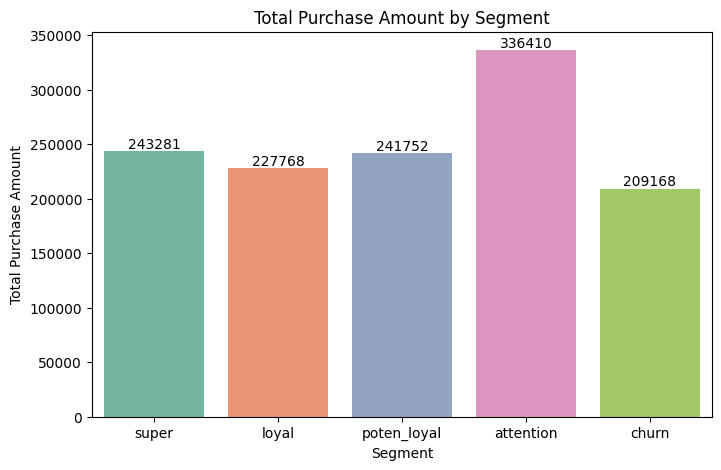

In [42]:
# 그룹별 총 구매 금액
seg_sum = data.groupby('Segment')['Monetary'].sum()

# 고객 그룹 순서 지정
order = ['super', 'loyal', 'poten_loyal', 'attention', 'churn']

# 지정된 순서에 맞게 데이터프레임 정렬
sorted_seg_sum = seg_sum.loc[order]

plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_seg_sum.index, y=sorted_seg_sum.values, palette='Set2')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xlabel('Segment')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Segment')
plt.show()

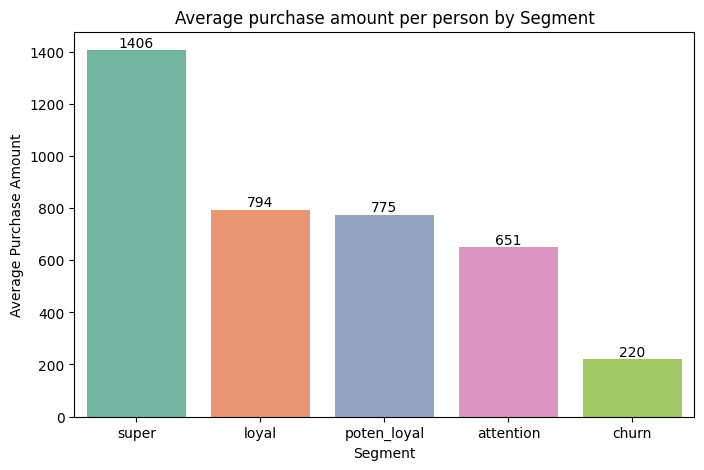

In [43]:
# 그룹별 1인 평균 구매 금액
seg_mean = data.groupby('Segment')['Monetary'].mean()

sorted_seg_mean = seg_mean.loc[order]

plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_seg_mean.index, y=sorted_seg_mean.values, palette='Set2')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xlabel('Segment')
plt.ylabel('Average Purchase Amount')
plt.title('Average purchase amount per person by Segment')
plt.show()

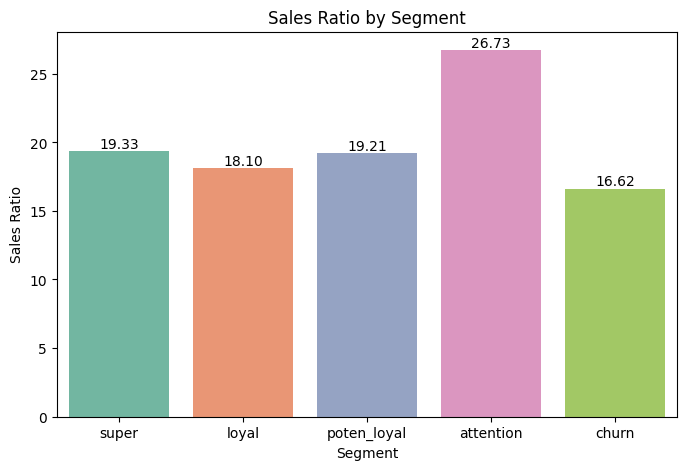

In [44]:
# 그룹별 매출 비중 계산
total_sales = data['Monetary'].sum()
seg_percent = (seg_sum / total_sales * 100)

sorted_seg_percent = seg_percent.loc[order]

plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_seg_percent.index, y=sorted_seg_percent.values, palette='Set2')

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.xlabel('Segment')
plt.ylabel('Sales Ratio')
plt.title('Sales Ratio by Segment')
plt.show()

- 그룹별 총 구매 금액과 매출 비중은 attention 그룹이 제일 높고, 그룹별 1인 평균 구매금액은 super 그룹이 제일 높다.

- super 그룹은 다른 그룹보다 지불능력이 좋다.

- attention 그룹은 churn 그룹 다음으로 고객 수가 많은 만큼 적절한 비즈니스 전략을 통해 지속적으로 서비스를 이용해서 poten_loyal, loyal 그룹으로 이동시킬 필요가 있다.

- loyal 그룹은 super 그룹으로, poten_loyal 그룹은 loyal, super 그룹으로 이동시킬 전략이 필요하다

<Figure size 1000x600 with 0 Axes>

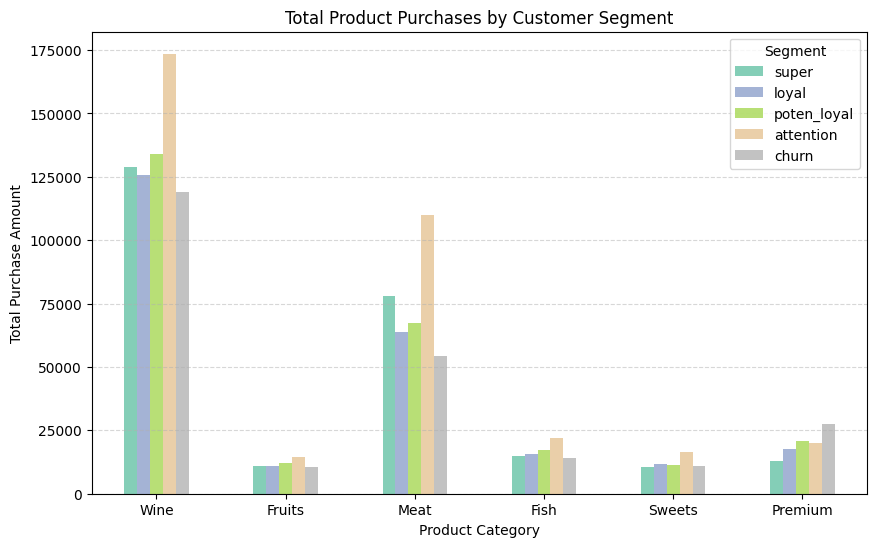

In [45]:
# 그룹별 제품 총 구매량 비교
# 그룹별 총 구매량 계산
grouped_prod_sum = data.groupby('Segment')[product_cols].sum()

sorted_grouped_prod_sum = grouped_prod_sum.loc[order]

# 시각화
plt.figure(figsize=(10, 6))
sorted_grouped_prod_sum.T.plot(kind='bar', figsize=(10, 6), colormap='Set2', alpha=0.8)
plt.title('Total Product Purchases by Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.legend(title='Segment')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<Figure size 1000x600 with 0 Axes>

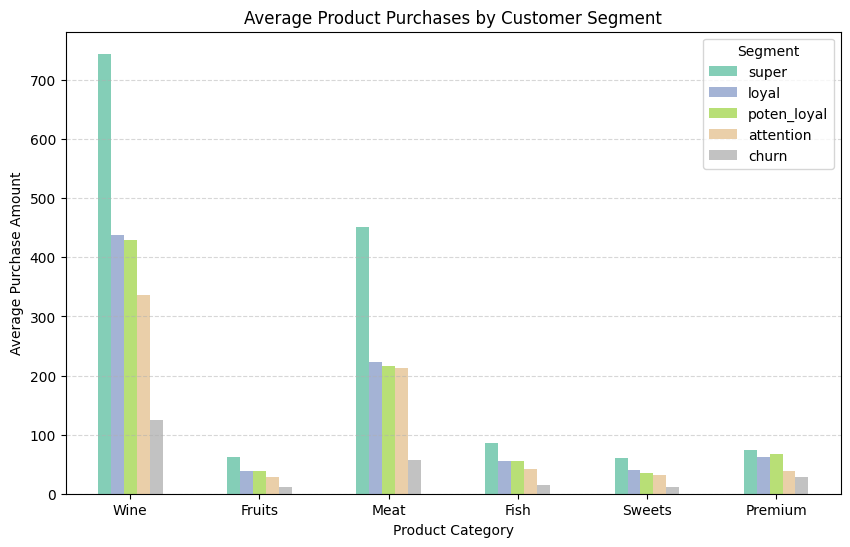

In [46]:
# 그룹별 제품 평균 구매량 비교
# 그룹별 평균 구매량 계산
grouped_prod_avg = data.groupby('Segment')[product_cols].mean()

sorted_grouped_prod_avg = grouped_prod_avg.loc[order]

# 시각화
plt.figure(figsize=(10, 6))
sorted_grouped_prod_avg.T.plot(kind='bar', figsize=(10, 6), colormap='Set2', alpha=0.8)
plt.title('Average Product Purchases by Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Segment')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

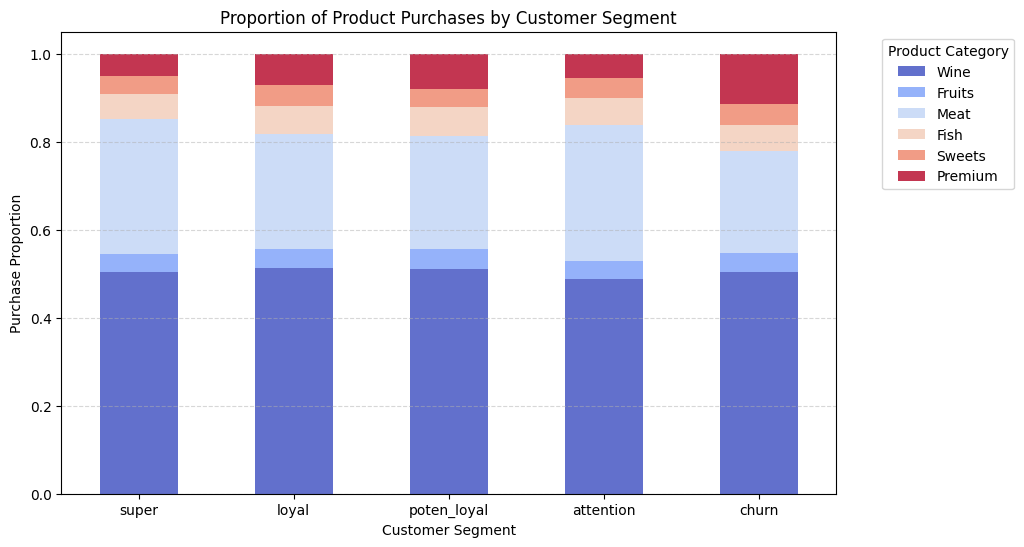

In [47]:
# 그룹별 제품별 구매 비중 비교
# 그룹별 전체 구매 금액에서 제품별 비율 계산
grouped_percentage = grouped_prod_avg.div(grouped_prod_avg.sum(axis=1), axis=0)

sorted_grouped_percentage = grouped_percentage.loc[order]

# 시각화
sorted_grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm', alpha=0.8)
plt.title('Proportion of Product Purchases by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Purchase Proportion')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

- 제품별 총 구매량은 와인과 육류가 제일 많았다
- Premium 제품의 경우 churn 그룹의 비중이 많았는데 churn 그룹의 고객 세분화 score를 생각했을 때(Recency score와 Monetary score가 1이 많음) 단발성 구매였던 것으로 보인다
- churn 그룹 다음으로는 loyal, poten_loyal 그룹이 Premium 제품 구매를 많이 했다

# 비즈니스 전략 제안

**주요 마케팅 타겟 제안**

- 제품군: 와인, 육류
- 구매 채널: 오프라인 매장
- 고객 그룹: 관심 필요 고객(attention), 잠재 충성 고객(poten_loyal)

    - <타겟 고객 그룹 선정 이유>
    - 관심 필요 고객
        - 고객 수가 가장 많고 총 구매 금액이 가장 높으며 Recency, Monetary, Engagement score 중 하나라도 점수가 올라가면 잠재 충성 고객이 된다.

    - 잠재 충성 고객
        - 충성 고객 그룹과 더불어 고객 수와 매출 비중을 다수 차지하는 주요 고객층이다.
        - Recency, Monetary, Engagement score가 하나라도 올라가면 충성 고객이 될 가능성이 높으며, 충성 고객으로 전환되도록 유도하여 충성 고객 다수 확보 시 슈퍼 고객으로 발전할 가능성이 크다.

**그룹별 비즈니스 전략 제안**


- 슈퍼 고객
    - 특징: Monetary score와 Engagement score도 높지만 특히 Recency score가 높다.
    - 제안 1: 한 달 이내 혹은 다음 달에도 지속적으로 방문하고 구매할 수 있도록 푸쉬알림이나 리마인드 메시지를 발송한다.
    - 제안 2: 슈퍼 고객 그룹 전용 상품 판매나 증정품 제공 등 맞춤형 감사 이벤트를 진행한다.

- 충성 고객
    - 특징: 슈퍼 고객 그룹과 비교하여 구매력이 조금 낮은 편이다. 한 번에 많은 금액을 소비하게 하기 보다는 지속적으로 이용하도록 한다.
    - 제안 1: 구매 빈도를 늘릴 수 있도록 포인트 리워드를 강화한다.
    - 제안 2: 상위 그룹 멤버십 혜택을 체험할 수 있도록 한다.(증정품 제공, 와인 시음회 참여 기회 제공 등)

- 잠재 충성 고객
    - 특징: 고객 참여도의 분포 범위가 1~28회로 넓고 충성 고객 그룹이 최소 11회 방문한 것과 비교하면 고객 참여도가 낮은 편이다.
    - 제안 1: 상위 그룹 멤버십 혜택을 체험할 수 있도록 한다.
    - 제안 2: 웹 채널을 통한 구매 혜택을 제공하여 오프라인 매장에서의 구매 경험을 다양한 채널에서 경험하도록 한다.

- 관심 필요 고객
    - 특징: 다른 그룹에 비해 Premium 제품을 제외한 모든 제품에 대한 구매량이 높다. 절반 이상이 최근 방문한 지 한 달 이상 된 고객들이다.
    - 제안 1: 전 제품군에 대한 맞춤 추천 서비스를 강화한다.
    - 제안 2: 첫 구매 이후 서비스 이용, 제품에 대한 만족도 조사를 실시하고 서비스 신뢰도를 향상시킨다.
    - 제안 3: 웹 채널을 통한 구매 혜택을 제공하여 오프라인 매장에서의 구매 경험을 다양한 채널에서 경험하도록 한다.

- 이탈 고객
    - 특징: 장기간 서비스를 이용하지 않은 고객 그룹이며, 다른 그룹에 비해 Premium 제품 구매 비중이 높다.
    - 제안: 리마인드 메시지 발송 시 Premium 제품에 대한 정보와 추천을 제공한다.



# 회고

- 데이터 출처의 정보가 부족해서 주관적인 설정이 들어갈 수 밖에 없었던 점이 아쉽다.
- 머신러닝을 사용하지 않고 직접 고객 분류 하는 과정을 통해 효과적인 고객 세분화란 무엇인지, 고객 그룹을 어떻게 더 현실적으로 분류할 수 있을지 고민해보는 계기가 되었다.